# <div style="font-size: 13px;">
# ------------------------------------------------------------
#   <b>HR Analytics Project / ניתוח נטישת עובדים</b><br>
#   <b>Analysts:</b> Camila Or Andreev, Vardit Harari, Pinchas Billig, Moran Nuri Koren, Shai Shechter, Koral <br>
#   <b>Date:</b> 2025-11-17
# ------------------------------------------------------------
#
#   <b>Table of Contents / תוכן העניינים</b><br>
#   1. <a href="#Introduction-and-Objectives">Introduction and Objectives / מבוא ומטרות</a><br>
#   2. <a href="#Imports-and-Initial-Settings">Imports and Initial Settings / ייבוא ספריות והגדרות</a><br>
#   3. <a href="#Data-Loading-and-Overview">Data Loading and Overview / טעינת נתונים וסקירה</a><br>
#   4. <a href="#Data-Cleaning-and-Preparation">Data Cleaning and Preparation / ניקוי נתונים והכנה</a><br>
#   5. <a href="#Exploratory-Data-Analysis">Exploratory Data Analysis (EDA) / ניתוח נתונים חוקר</a><br>
#   6. <a href="#Insights-and-Conclusions">Insights and Conclusions / תובנות ומסקנות</a><br>
#   7. <a href="#Recommendations">Recommendations / המלצות</a><br>
#
...
# <a id='Introduction-and-Objectives'></a>
# <b>1. Introduction and Objectives / מבוא ומטרות</b><br>
#
# This notebook provides an in‑depth HR analytics and attrition investigation.
# מחברת זו מציגה ניתוח עומק של נתוני עובדים ונטישה, במטרה לזהות דפוסים וגורמי סיכון לנטישה
#
# <b>Objectives:</b>
# - Explore and analyze employee attrition data
# - Identify key drivers of attrition
# - Deliver actionable insights for HR stakeholders
#
# <b>מטרות:</b>
# - לחקור ולנתח את נתוני הנטישה בארגון
# - לזהות גורמים מרכזיים המשפיעים על עזיבת עובדים
# - לגבש תובנות אופרטיביות עבור הנהלת משאבי אנוש
#
# <b>Assumptions:</b>
# - The datasets are considered accurate and representative.
# - All personally identifying information is anonymized or removed.
# - Business requirements focus on voluntary attrition.
#
# <b>הנחות עבודה:</b>
# - מערך הנתונים מייצג ואמין.
# - כלל המידע המזהה עובדי הוסר או אנונימי.
# - המיקוד הוא בנטישה מרצון (ולא בפיטורים).
# </div>


# <a id='Imports-and-Initial-Settings'></a>
## 2. Imports and Initial Settings / ייבוא ספריות והגדרות ראשוניות


In [45]:
import pandas as pd


In [46]:
# Define the file path to the Excel dataset (relative to the project folder)
file_path = r"CSV & EXCEL TABLES/hrdb2.xlsx"

# Load both sheets: 
# sheet "1" contains the main HR features,
# sheet "2" contains Attrition and additional HR/demographic fields.
df1 = pd.read_excel(file_path, sheet_name="1")
df_attr = pd.read_excel(file_path, sheet_name="2")

print("Sheet 1 shape:", df1.shape)
print("Sheet 2 shape:", df_attr.shape)

# Merge ALL columns from sheet 2 (so we don't lose any like Age / Department / DistanceFromHome / Vectorization if it exists)
df = pd.merge(
    df1,
    df_attr,
    on="EmployeeNumber",
    how="left"
)

# Clean up column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Create numeric attrition flag: 1 = Yes (left), 0 = No (stayed)
df["Attrition_Flag"] = (df["Attrition"].astype(str).str.strip() == "Yes").astype(int)

# Quick sanity check
display(df.head())
print("Merged shape:", df.shape)
print("Columns:", df.columns.tolist())


Sheet 1 shape: (1470, 26)
Sheet 2 shape: (1470, 10)


,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Attrition_Flag
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,0
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,1
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,0
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,0


Merged shape: (1470, 36)
Columns: ['EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'Attrition_Flag']



# <a id='Data-Loading-and-Overview'></a>
## 3. Data Loading and Overview / טעינת נתונים וסקירה כללית

In this section we load the HR dataset from the Excel file and review its basic structure,
including column types, first rows, and descriptive statistics.
בקטע זה אנו טוענים את נתוני העובדים מקובץ ה‑Excel, ובוחנים באופן ראשוני את מבנה הטבלה:
שמות העמודות, סוגי הנתונים וסטטיסטיקות בסיסיות.


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   EnvironmentSatisfaction   1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   HourlyRate                1470 non-null   int64 
 4   JobInvolvement            1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike       

In [48]:
df.head()


,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Attrition_Flag
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,0
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,1
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,0
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,0


In [49]:
df.describe().round(1)


,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,Attrition_Flag
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,...,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,15.2,...,7.0,4.2,2.2,4.1,36.9,802.5,9.2,2.9,1.0,0.2
std,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,3.7,...,6.1,3.6,3.2,3.6,9.1,403.5,8.1,1.0,0.0,0.4
min,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,...,0.0,0.0,0.0,0.0,18.0,102.0,1.0,1.0,1.0,0.0
25%,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,...,3.0,2.0,0.0,2.0,30.0,465.0,2.0,2.0,1.0,0.0
50%,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,14.0,...,5.0,3.0,1.0,3.0,36.0,802.0,7.0,3.0,1.0,0.0
75%,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,18.0,...,9.0,7.0,3.0,7.0,43.0,1157.0,14.0,4.0,1.0,0.0
max,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,...,40.0,18.0,15.0,17.0,60.0,1499.0,29.0,5.0,1.0,1.0



# <a id='Data-Cleaning-and-Preparation'></a>
## 4. Data Cleaning and Preparation / ניקוי נתונים והכנתם לניתוח

Here we remove constant columns, check missing values and duplicates,
and create a clean working dataset for further analysis.

בשלב זה אנו מנקים את הנתונים: מסירים עמודות קבועות שאין בהן מידע,
בודקים אם קיימים ערכים חסרים או רשומות כפולות, ומכינים סט נתונים נקי לניתוח.


In [50]:
nunique = df.nunique()
constant_mask = nunique <= 1
constant_indices = constant_mask[constant_mask].index
constant_cols = constant_indices.tolist()
constant_cols


['Over18', 'StandardHours', 'EmployeeCount']

In [51]:
df = df.drop(columns=constant_cols)


In [52]:
df.isna().values.any()


np.False_

In [53]:
df.drop_duplicates()


,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,...,YearsWithCurrManager,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Attrition_Flag
0,1,2,Female,94,3,2,Sales Executive,4,Single,5993,...,5,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1
1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,...,7,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,0
2,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,...,0,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1
3,5,4,Female,56,3,1,Research Scientist,3,Married,2909,...,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,0
4,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,...,2,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,...,3,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,0
1466,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,...,7,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,0
1467,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,...,3,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,0
1468,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,...,8,49,No,Travel_Frequently,1023,Sales,2,3,Medical,0



# <a id='Exploratory-Data-Analysis'></a>
## 5. Exploratory Data Analysis (EDA) / ניתוח נתונים חוקר

This section explores relationships between attrition and key HR variables such as
tenure, income, satisfaction, promotion, performance, and commuting distance.

בקטע זה אנו בודקים את הקשר בין נטישת עובדים לבין משתנים מרכזיים:
וותק, שכר, שביעות רצון, קידום, ביצועים ומרחק מהבית.


In [54]:

# לוודא טיפוסים אחרי הניקוי והאיחוד
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   EnvironmentSatisfaction   1470 non-null   int64 
 2   Gender                    1470 non-null   object
 3   HourlyRate                1470 non-null   int64 
 4   JobInvolvement            1470 non-null   int64 
 5   JobLevel                  1470 non-null   int64 
 6   JobRole                   1470 non-null   object
 7   JobSatisfaction           1470 non-null   int64 
 8   MaritalStatus             1470 non-null   object
 9   MonthlyIncome             1470 non-null   int64 
 10  MonthlyRate               1470 non-null   int64 
 11  NumCompaniesWorked        1470 non-null   int64 
 12  OverTime                  1470 non-null   object
 13  PercentSalaryHike         1470 non-null   int64 
 14  PerformanceRating       

In [55]:
import numpy as np

# רק משתנים מספריים
num_cols = df.select_dtypes(include=[np.number]).columns
features = [c for c in num_cols if c != 'Attrition_Flag']

# קורלציה של כל משתנה עם עזיבה
corr_with_attr = (
    df[features]
    .corrwith(df['Attrition_Flag'])
    .sort_values(key=lambda s: s.abs(), ascending=False)
)

print(corr_with_attr)


TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
NumCompaniesWorked          0.043494
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
MonthlyRate                 0.015170
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
dtype: float64


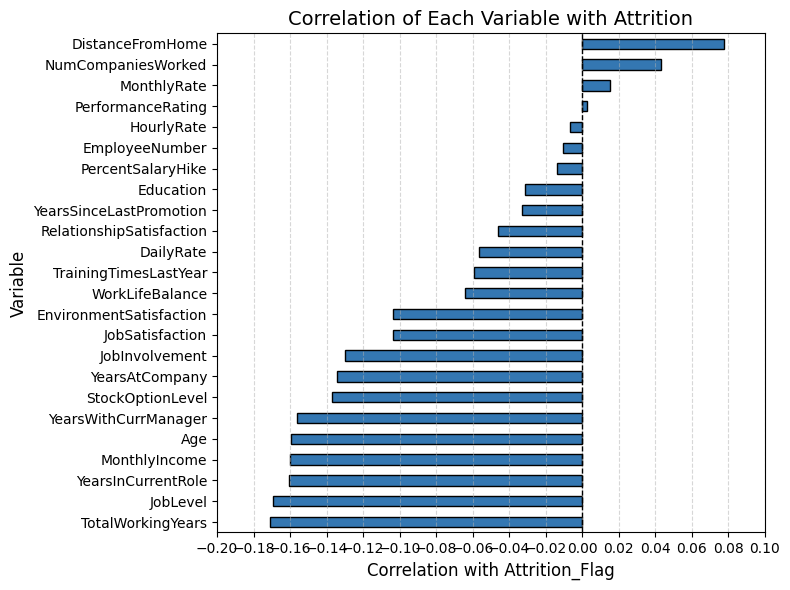

In [56]:
import matplotlib.pyplot as plt

# Plot: Correlation of each variable with Attrition
fig, ax = plt.subplots(figsize=(8, 6))

# Sort values for clear plotting
corr_sorted = corr_with_attr.sort_values()
corr_sorted.plot(kind='barh', ax=ax, color="#3477b2", edgecolor='black')

# Draw a vertical line at zero for reference
ax.axvline(0, linestyle='--', linewidth=1, color='black')

# Set x-axis limits with a margin
xmin = np.floor(corr_sorted.min() * 20) / 20
xmax = np.ceil(corr_sorted.max() * 20) / 20
ax.set_xlim(xmin, xmax)

# Set x-axis ticks at fixed intervals, e.g., every 0.02
xticks = np.arange(xmin, xmax + 0.001, 0.02)
ax.set_xticks(xticks)

# Add vertical grid lines for x-axis for readability
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Title and labels
ax.set_title("Correlation of Each Variable with Attrition", fontsize=14)
ax.set_xlabel("Correlation with Attrition_Flag", fontsize=12)
ax.set_ylabel("Variable", fontsize=12)

plt.tight_layout()
plt.show()


## <div style="font-size:20px;">The correlations between each individual variable and attrition are low (most |r| < 0.1), indicating that no single variable strongly explains attrition; the relationships are weak and suggest only general trends rather than strong effects.</div>


### 4.1 Attrition Trends – מגמות עזיבה

In this subsection we look at how overall attrition is distributed across the workforce:
which share of employees stayed, and which share left the organization.

כאן אנו בוחנים את שיעור הנטישה הכללי- כמה מהעובדים נשארו בארגון וכמה עזבו 
ומנסים לזהות האם מדובר בתופעה נקודתית או בדפוס רחב יותר


In [57]:
attrition_summary = (
    df['Attrition_Flag']
    .value_counts()
    .rename(index={0: 'Stayed', 1: 'Left'})
    .to_frame('Employees')
)
attrition_summary['Share_%'] = (attrition_summary['Employees'] / len(df) * 100).round(1)

display(attrition_summary)
print(f"Overall attrition rate: {attrition_summary.loc['Left', 'Share_%']:.1f}%")


,Employees,Share_%
Attrition_Flag,,
Stayed,1233,83.9
Left,237,16.1


Overall attrition rate: 16.1%



In this subsection we break down attrition by department to understand where turnover is most concentrated.
We compare how many employees left out of the total in each department and identify units with especially high attrition rates that may require targeted managerial attention.

 שיעורי עזיבה לפי מחלקות 

In [58]:
# Create a table of attrition rates by department
# Assumes 'Department' and 'Attrition_Flag' columns exist in df

dept_attrition = (
    df.groupby('Department')['Attrition_Flag']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'Total_Employees', 'sum': 'Num_Left'})
)
dept_attrition['Attrition_Rate_%'] = dept_attrition['Num_Left'] / dept_attrition['Total_Employees'] * 100

# Display the table sorted by attrition rate descending
dept_attrition_sorted = dept_attrition.sort_values('Attrition_Rate_%', ascending=False)
print(dept_attrition_sorted[['Attrition_Rate_%', 'Num_Left', 'Total_Employees']])


                        Attrition_Rate_%  Num_Left  Total_Employees
Department                                                         
Sales                          20.627803        92              446
Human Resources                19.047619        12               63
Research & Development         13.839750       133              961


C:\Users\moran\AppData\Local\Temp\ipykernel_196\1028173846.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\moran\AppData\Local\Temp\ipykernel_196\1028173846.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=11)


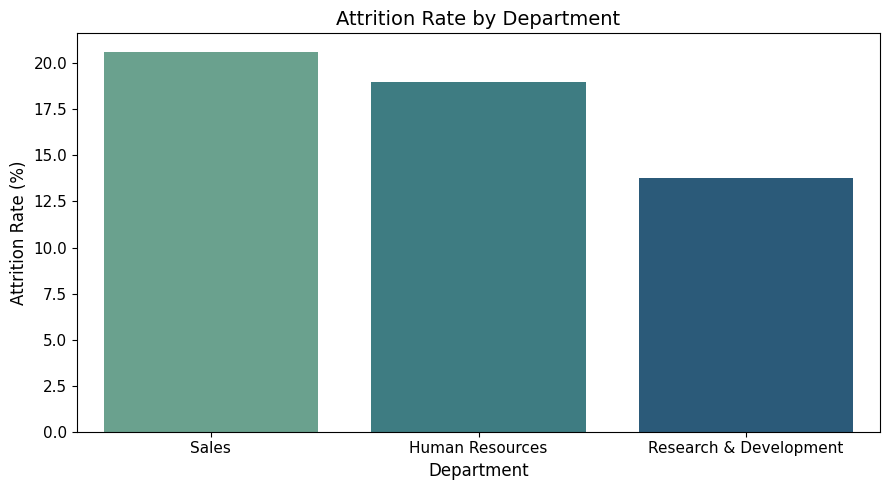

,Department,TotalEmployees,NumLeft,AttritionRate_%
2,Sales,446,92,20.6
0,Human Resources,63,12,19.0
1,Research & Development,961,133,13.8


In [59]:
# KPI: Attrition Rate by Department

import seaborn as sns  

dept_counts = df.groupby('Department', observed=True)['Attrition_Flag'].agg(
    TotalEmployees='count',
    NumLeft='sum'
)

dept_counts['AttritionRate_%'] = (dept_counts['NumLeft'] / dept_counts['TotalEmployees'] * 100).round(1)
dept_counts = dept_counts.reset_index().sort_values('AttritionRate_%', ascending=False)

# תרשים - שיעור עזיבה לפי מחלקה
plt.figure(figsize=(9, 5))
ax = sns.barplot(
    data=dept_counts,
    x='Department',
    y='AttritionRate_%',
    palette='crest'
)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.title('Attrition Rate by Department', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

# הצג טבלה לעיון
display(dept_counts)



שיעורי נטישה לפי תפקיד (JobRole)

In [60]:
# Create a table of attrition rates by JobRole
# Assumes 'JobRole' and 'Attrition_Flag' columns exist in df

jobrole_attrition = (
    df.groupby('JobRole')['Attrition_Flag']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'Total_Employees', 'sum': 'Num_Left'})
)
jobrole_attrition['Attrition_Rate_%'] = jobrole_attrition['Num_Left'] / jobrole_attrition['Total_Employees'] * 100

# Display the table sorted by attrition rate descending
jobrole_attrition_sorted = jobrole_attrition.sort_values('Attrition_Rate_%', ascending=False)
print(jobrole_attrition_sorted[['Attrition_Rate_%', 'Num_Left', 'Total_Employees']])


                           Attrition_Rate_%  Num_Left  Total_Employees
JobRole                                                               
Sales Representative              39.759036        33               83
Laboratory Technician             23.938224        62              259
Human Resources                   23.076923        12               52
Sales Executive                   17.484663        57              326
Research Scientist                16.095890        47              292
Manufacturing Director             6.896552        10              145
Healthcare Representative          6.870229         9              131
Manager                            4.901961         5              102
Research Director                  2.500000         2               80


שיעור נטישה לפי דרגת תפקיד

,JobLevel,AttritionRate_%
0,1,26.3
1,2,9.7
2,3,14.7
3,4,4.7
4,5,7.2


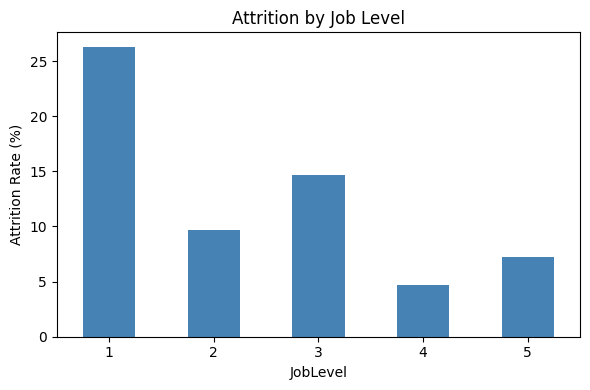

In [61]:
joblevel_attr = (
    df.groupby('JobLevel')['Attrition_Flag']
    .mean()
    .mul(100)
    .round(1)
    .rename('AttritionRate_%')
    .reset_index()
)

display(joblevel_attr)

ax = joblevel_attr.plot(
    x='JobLevel',
    y='AttritionRate_%',
    kind='bar',
    color='steelblue',
    legend=False,
    figsize=(6, 4)
)
ax.set_ylabel('Attrition Rate (%)')
ax.set_title('Attrition by Job Level')
ax.set_xticklabels(joblevel_attr['JobLevel'], rotation=0)  # Set horizontal xticklabels
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


### 4.2 Compensation and Benefits – תגמול והטבות

**English:**  
This section examines how compensation variables—such as monthly income and salary differences across departments—relate to employee attrition.

<div dir='rtl'>
בקטע זה אנו בודקים כיצד משתני תגמול, כגון שכר חודשי והבדלי שכר בין מחלקות, קשורים לנטישת עובדים.
הניתוח מסייע לזהות האם עובדים בעלי שכר נמוך יותר נמצאים בסיכון גבוה לעזיבה, והיכן קיימים פערים משמעותיים בין יחידות הארגון.
</div>


### Attrition by Tenure Bucket – Interpretation / פרשנות לפי ותק

The chart shows how the probability of attrition changes with employees’ tenure at the company:

- Very early tenure is the highest-risk period.
- After several years, attrition stabilizes at lower levels.
- Long-tenured employees are the most stable, with a slight rise again towards the end of career.

.
.

- בשנות העבודה הראשונות הסיכון לנטישה הוא הגבוה ביותר
- לאחר מספר שנים (3–5) שיעור הנטישה יורד ומתייצב
- עובדים ותיקים מאוד נוטים להישאר, אך ייתכנו עזיבות הקשורות לפרישה או שינוי קריירה


C:\Users\moran\AppData\Local\Temp\ipykernel_196\4134131726.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureBucket')['Attrition_Flag']


,TenureBucket,AttritionRate_%
0,<1y,34.9
1,1-3y,18.4
2,3-5y,13.1
3,5-10y,12.3
4,10-20y,6.7
5,20y+,12.1


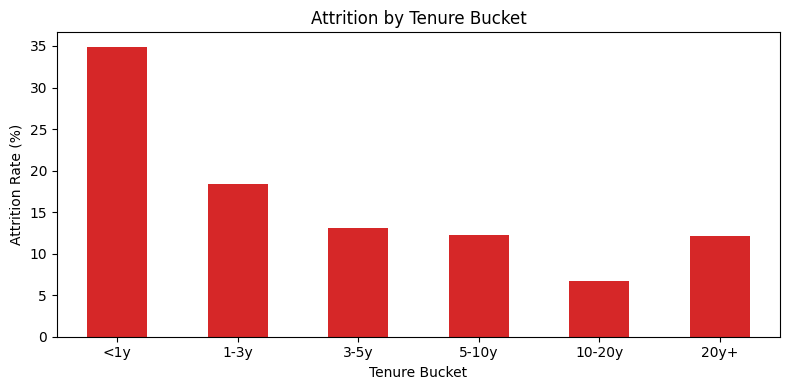

In [62]:
tenure_bins = [-1, 1, 3, 5, 10, 20, df['YearsAtCompany'].max()]
tenure_labels = ['<1y', '1-3y', '3-5y', '5-10y', '10-20y', '20y+']

df['TenureBucket'] = pd.cut(df['YearsAtCompany'], bins=tenure_bins, labels=tenure_labels)

tenure_attr = (
    df.groupby('TenureBucket')['Attrition_Flag']
    .mean()
    .mul(100)
    .round(1)
    .rename('AttritionRate_%')
    .reset_index()
)

display(tenure_attr)

ax = tenure_attr.plot(
    x='TenureBucket',
    y='AttritionRate_%',
    kind='bar',
    color='tab:red',
    legend=False,
    figsize=(8, 4)
)
ax.set_ylabel('Attrition Rate (%)')
ax.set_xlabel('Tenure Bucket')
ax.set_title('Attrition by Tenure Bucket')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


שכר חודשי לפי מחלקה ונטישה

,mean,median
Attrition_Flag,,
Stayed,6833.0,5204.0
Left,4787.0,3202.0


Attrition_Flag,Stayed,Left
Department,,
Human Resources,7346.0,3716.0
Research & Development,6630.0,4108.0
Sales,7232.0,5908.0


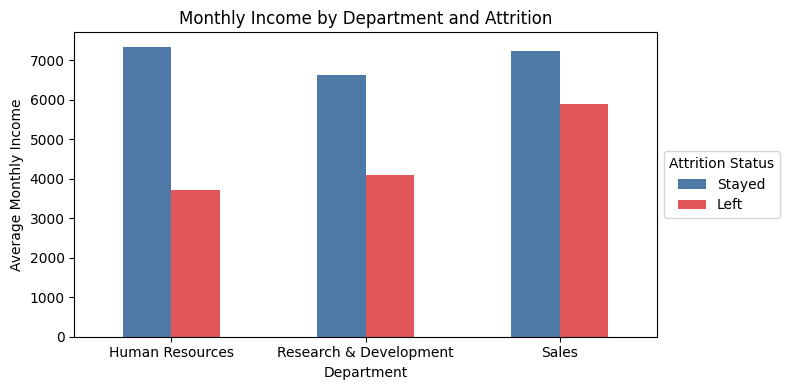

In [63]:
income_summary = (
    df.groupby('Attrition_Flag')['MonthlyIncome']
    .agg(['mean', 'median'])
    .rename(index={0: 'Stayed', 1: 'Left'})
    .round(0)
)

display(income_summary)

income_by_dept = (
    df.groupby(['Department', 'Attrition_Flag'])['MonthlyIncome']
    .mean()
    .unstack(fill_value=0)
    .rename(columns={0: 'Stayed', 1: 'Left'})
    .round(0)
)

display(income_by_dept)

# Plot with centered titles and legend placed so it does not hide the graph
ax = income_by_dept[['Stayed', 'Left']].plot(
    kind='bar',
    figsize=(8, 4),
    color=['#4e79a7', '#e15759']
)
ax.set_ylabel('Average Monthly Income')
ax.set_title('Monthly Income by Department and Attrition', loc='center')
ax.set_xlabel('Department')
plt.xticks(rotation=0, ha='center')  # Straighten X-axis labels

# Move legend to the right of the plot so that it does not cover the graph
plt.legend(title='Attrition Status', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.show()


The charts show two compensation-related indicators - Stock Option Level and Percent Salary Hike - compared between employees who stayed and those who left.

Employees who stayed tend to have higher stock option levels, indicating stronger long-term incentives.

The salary hike percentage is almost identical between groups, suggesting that recent raises did not significantly influence attrition.

Overall, stock options appear to have a stronger retention effect than annual salary increases.




,StockOptionLevel,PercentSalaryHike
Attrition_Flag,,
Stayed,0.845,15.231
Left,0.527,15.097


C:\Users\moran\AppData\Local\Temp\ipykernel_196\1408069730.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\moran\AppData\Local\Temp\ipykernel_196\1408069730.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


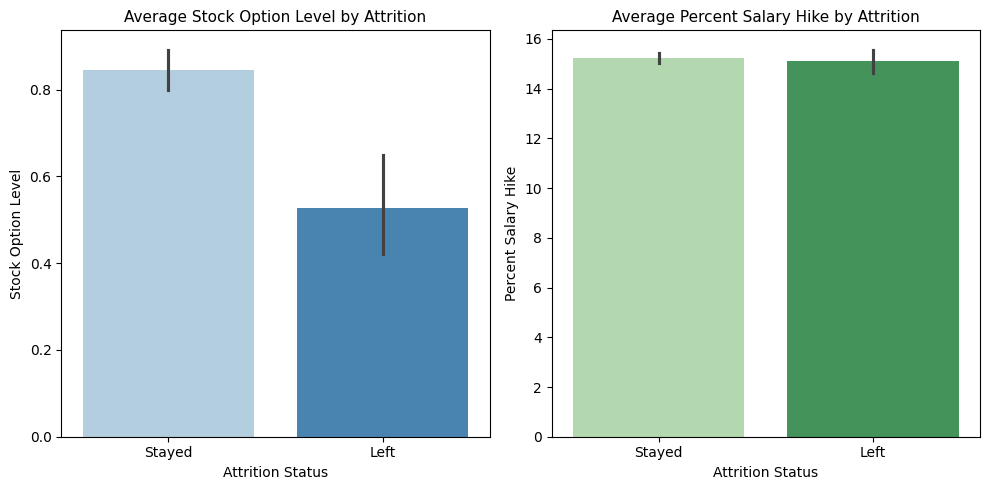

In [64]:
# Examining the impact of Stock Option Level and Salary Increase on Employee Attrition

import seaborn as sns

# Compare means - Stock Option Level and Percent Salary Hike between stayers and leavers
impact_summary = (
    df.groupby('Attrition_Flag')[['StockOptionLevel', 'PercentSalaryHike']]
    .mean()
    .rename(index={0: 'Stayed', 1: 'Left'})
    .round(3)
)
display(impact_summary)

# Bar plots: mean Stock Option Level and mean Percent Salary Hike by attrition status
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Stock Option Level
sns.barplot(
    data=df, x='Attrition_Flag', y='StockOptionLevel',
    ax=axes[0], palette='Blues', legend=False
)
axes[0].set_title('Average Stock Option Level by Attrition', fontsize=11)
axes[0].set_xlabel('Attrition Status', fontsize=10)
axes[0].set_ylabel('Stock Option Level', fontsize=10)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Stayed', 'Left'])

# Percent Salary Hike
sns.barplot(
    data=df, x='Attrition_Flag', y='PercentSalaryHike',
    ax=axes[1], palette='Greens', legend=False
)
axes[1].set_title('Average Percent Salary Hike by Attrition', fontsize=11)
axes[1].set_xlabel('Attrition Status', fontsize=10)
axes[1].set_ylabel('Percent Salary Hike', fontsize=10)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Stayed', 'Left'])

plt.tight_layout()
plt.show()




### 4.3 Work–Life Balance and Satisfaction – איזון חיים-עבודה ושביעות רצון

Here we analyze variables such as WorkLifeBalance, JobSatisfaction and EnvironmentSatisfaction.


בקטע זה אנו בודקים האם עובדים שחווים איזון טוב יותר בין בית לעבודה ושביעות רצון גבוהה יותר
נוטים להישאר בארגון, לעומת עובדים המדווחים על שחיקה או חוסר שביעות רצון


,WorkLifeBalance,AttritionRate_%
0,1,31.2
1,2,16.9
2,3,14.2
3,4,17.6


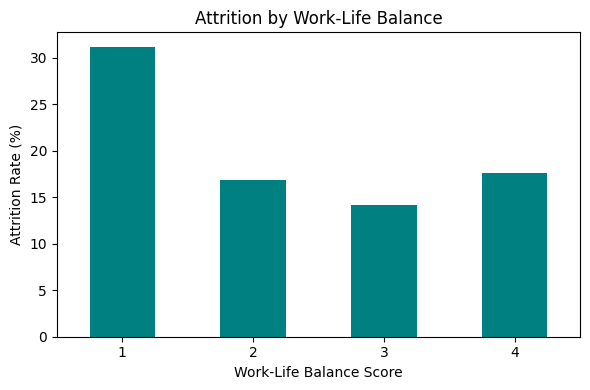

In [65]:
kpi_wlb = (
    df.groupby('WorkLifeBalance')['Attrition_Flag']
    .mean()
    .mul(100)
    .round(1)
    .rename('AttritionRate_%')
    .reset_index()
)

display(kpi_wlb)

ax = kpi_wlb.plot(
    x='WorkLifeBalance',
    y='AttritionRate_%',
    kind='bar',
    legend=False,
    color='teal',
    figsize=(6, 4)
)
ax.set_ylabel('Attrition Rate (%)')
ax.set_xlabel('Work-Life Balance Score')
ax.set_title('Attrition by Work-Life Balance')
# Make sure the x-tick labels (numbers) are horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()


בדיקת קשר בין איזון חיים–עבודה לנטישה בכל מחלקה

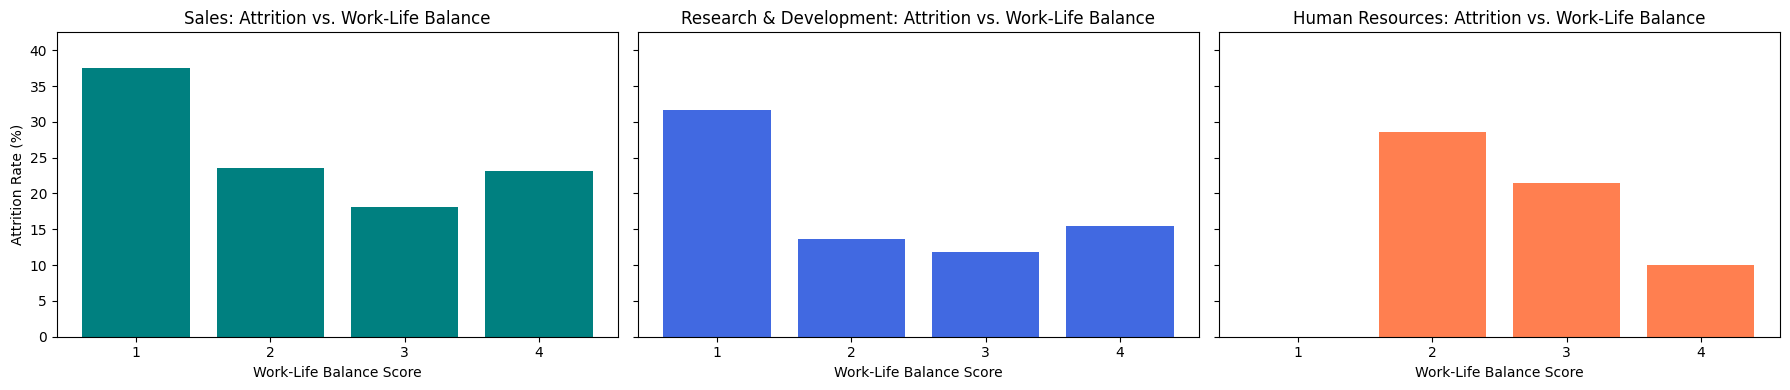

,WorkLifeBalance,AttritionRate_%,Department
0,1,37.5,Sales
1,2,23.5,Sales
2,3,18.1,Sales
3,4,23.1,Sales


,WorkLifeBalance,AttritionRate_%,Department
0,1,31.7,Research & Development
1,2,13.6,Research & Development
2,3,11.8,Research & Development
3,4,15.4,Research & Development


,WorkLifeBalance,AttritionRate_%,Department
0,1,0.0,Human Resources
1,2,28.6,Human Resources
2,3,21.4,Human Resources
3,4,10.0,Human Resources


In [66]:
# Show three side-by-side plots for the three departments

# List of main departments present in the data
departments = ['Sales', 'Research & Development', 'Human Resources']

# Prepare data for each department
kpi_wlb_depts = []
for dept in departments:
    mask = df['Department'].str.lower() == dept.lower()
    df_dept = df.loc[mask].copy()
    kpi = (
        df_dept.groupby('WorkLifeBalance')['Attrition_Flag']
        .mean()
        .mul(100)
        .round(1)
        .rename('AttritionRate_%')
        .reset_index()
    )
    kpi['Department'] = dept
    kpi_wlb_depts.append(kpi)

# Set up the side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colors = ['teal', 'royalblue', 'coral']
for i, (kpi, dept, color) in enumerate(zip(kpi_wlb_depts, departments, colors)):
    ax = axes[i]
    ax.bar(kpi['WorkLifeBalance'], kpi['AttritionRate_%'], color=color)
    ax.set_title(f'{dept}: Attrition vs. Work-Life Balance')
    ax.set_xlabel('Work-Life Balance Score')
    ax.set_xticks(kpi['WorkLifeBalance'])
    ax.set_xticklabels(kpi['WorkLifeBalance'], rotation=0)
    if i == 0:
        ax.set_ylabel('Attrition Rate (%)')
    else:
        ax.set_ylabel('')
    ax.set_ylim(0, max(k['AttritionRate_%'].max() for k in kpi_wlb_depts) + 5)
plt.tight_layout()
plt.show()

# Optionally, display the summary tables for reference
for kpi in kpi_wlb_depts:
    display(kpi)


שכר חודשי ממוצע לפי רמת שביעות רצון


### Job Satisfaction Analysis – ניתוח שביעות רצון

#### Part 1 – Job Satisfaction and Attrition

This part compares average job satisfaction levels between employees who stayed and those who left, to assess whether dissatisfaction is associated with turnover.


בקטע זה אנו משווים בין רמות שביעות הרצון של עובדים שנשארו לבין עובדים שעזבו, כדי לבדוק אם שביעות רצון נמוכה קשורה לנטישה
</div>




,Avg_JobSatisfaction
Attrition_Flag,
Stayed,2.78
Left,2.47


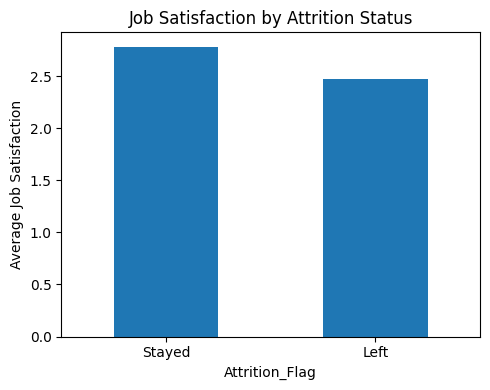

In [67]:
# Part 1 – Job Satisfaction and Attrition

satisfaction_by_attr = (
    df.groupby('Attrition_Flag')['JobSatisfaction']
    .mean()
    .rename(index={0: 'Stayed', 1: 'Left'})
    .round(2)
    .to_frame('Avg_JobSatisfaction')
)

display(satisfaction_by_attr)

# (אופציונלי) גרף קטן להמחשה
ax = satisfaction_by_attr['Avg_JobSatisfaction'].plot(
    kind='bar',
    figsize=(5, 4),
    ylabel='Average Job Satisfaction',
    title='Job Satisfaction by Attrition Status',
    legend=False
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




Although the difference in average job satisfaction is moderate (2.78 for employees who stayed vs. 2.47 for those who left), it is consistent and meaningful.  
Employees who leave tend to report lower satisfaction, indicating a clear — though not dramatic — connection between dissatisfaction and attrition.


 
הפער בשביעות הרצון הממוצעת בין עובדים שנשארו (2.78) לבין עובדים שעזבו (2.47) הוא מתון אך עקבי.  
עובדים שעוזבים מדווחים על שביעות רצון נמוכה יותר, מה שמצביע על קשר ברור בין חוסר שביעות רצון לבין נטישה

</div>


#### Part 2 – Job Satisfaction and Monthly Income
  
Here we examine whether monthly income varies by satisfaction level and compute the correlation between income and satisfaction.


כאן אנו בוחנים האם השכר החודשי משתנה לפי רמות שביעות רצון, ומהו המתאם בין שכר לבין שביעות רצון
</div>

The chart shows that average monthly income is very similar across all satisfaction levels.

Combined with the near-zero correlation (–0.01), this confirms there is no meaningful linear relationship between pay and job satisfaction in this dataset

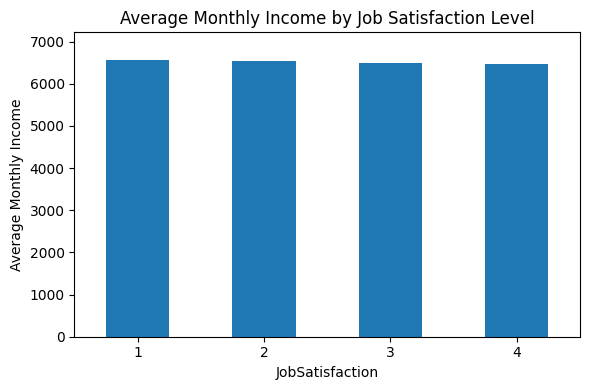

In [68]:
ax = income_by_satisfaction.plot(
    x='JobSatisfaction',
    y='AvgMonthlyIncome',
    kind='bar',
    figsize=(6, 4),
    legend=False
)
ax.set_ylabel('Average Monthly Income')
ax.set_title('Average Monthly Income by Job Satisfaction Level')
ax.set_ylim(0, income_by_satisfaction['AvgMonthlyIncome'].max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### 4.4 Promotion and Job Stability – קידום ויציבות תעסוקתית

We compare years since last promotion and years in current role between leavers and stayers.

הניתוח בוחן האם עיכוב בקידום או תקופה ארוכה ללא שינוי תפקיד
מגדילים את הסיכון לנטישה



Employees who left the company had roughly the same time since their last promotion as those who stayed 
(mean of 1.95 vs. 2.23 years, both with a median of 1 year).
This indicates that time since the last promotion does not appear to be a meaningful predictor of attrition in this dataset

העובדים שעזבו קיבלו את הקידום האחרון שלהם כמעט באותו פרק זמן כמו העובדים שנשארו (ממוצע 1.95 לעומת 2.23 שנים, ובשתי הקבוצות החציון הוא שנה אחת)
לכן, נראה כי הזמן שעבר מאז הקידום האחרון אינו מהווה גורם משמעותי המסביר נטישה במערך הנתונים הזה

In [69]:
promotion_gap = (
    df.groupby('Attrition_Flag')['YearsSinceLastPromotion']
    .agg(['mean', 'median'])
    .rename(index={0: 'Stayed', 1: 'Left'})
    .round(2)
)

display(promotion_gap)

print(
    "Gap between promotions is very similar for leavers vs stayers, so time since last promotion alone is not a strong signal."
)


,mean,median
Attrition_Flag,,
Stayed,2.23,1.0
Left,1.95,1.0


Gap between promotions is very similar for leavers vs stayers, so time since last promotion alone is not a strong signal.


 
Employees who left the company had significantly lower tenure compared to those who stayed.  
On average, leavers worked **2.2 fewer years** at the company (5.13 vs. 7.37) and had **1.6 fewer years** in their current role (2.90 vs. 4.48).  
This indicates that shorter company tenure and shorter role tenure are strong indicators of higher attrition risk.



העובדים שעזבו את הארגון הציגו ותק נמוך משמעותית לעומת אלה שנשארו.  
בממוצע, עובדים שעזבו עבדו **כ־2.2 שנים פחות** בחברה (5.13 לעומת 7.37) והחזיקו בתפקיד הנוכחי **כ־1.6 שנים פחות** (2.90 לעומת 4.48).  
ממצאים אלה מצביעים על כך שותק בחברה וותתק קצר בתפקיד הם גורמי סיכון מרכזיים לנטישה.

</div>


,YearsAtCompany,YearsInCurrentRole
Attrition_Flag,,
Stayed,7.37,4.48
Left,5.13,2.90


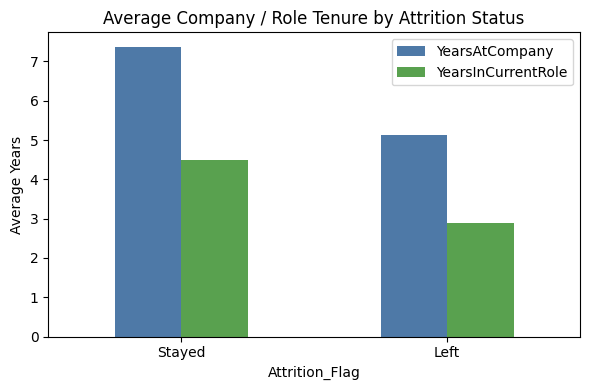

In [70]:
tenure_summary = (
    df.groupby('Attrition_Flag')[['YearsAtCompany', 'YearsInCurrentRole']]
    .mean()
    .rename(index={0: 'Stayed', 1: 'Left'})
    .round(2)
)

display(tenure_summary)

ax = tenure_summary.plot(
    kind='bar',
    figsize=(6, 4),
    color=['#4e79a7', '#59a14f']
)
ax.set_ylabel('Average Years')
ax.set_title('Average Company / Role Tenure by Attrition Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Combined Interpretation – Promotions vs. Tenure  
### שילוב הממצאים – קידומים לעומת ותק


The time since last promotion is very similar for employees who stayed and those who left, which means promotion timing alone does not explain attrition.  
However, overall company tenure and role tenure are clearly lower among leavers.  
This suggests that employees tend to leave earlier in their tenure, even though the promotion cadence is roughly similar across groups.



מספר השנים מאז הקידום האחרון דומה מאוד בין עובדים שנשארו לבין עובדים שעזבו, ולכן עיתוי הקידום כשלעצמו אינו מסביר את הנטישה.  
עם זאת, הוותק הכולל בחברה והוותק בתפקיד נמוכים משמעותית אצל העובדים שעזבו.  
כלומר, עובדים נוטים לעזוב בשלבים מוקדמים יותר של הקריירה שלהם בארגון, אף על פי שקצב הקידומים דומה בין הקבוצות.

</div>


### 4.5 Performance and Attrition – ביצועים ועזיבה

This section investigates the relationship between performance ratings and attrition outcomes.


כאן אנו בודקים האם עובדים בעלי ביצועים נמוכים עוזבים או מפוטרים בשיעור גבוה יותר,
או שמא דווקא עובדים בעלי ביצועים גבוהים עוזבים בגלל הזדמנויות טובות יותר בשוק


C:\Users\moran\AppData\Local\Temp\ipykernel_196\364061507.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


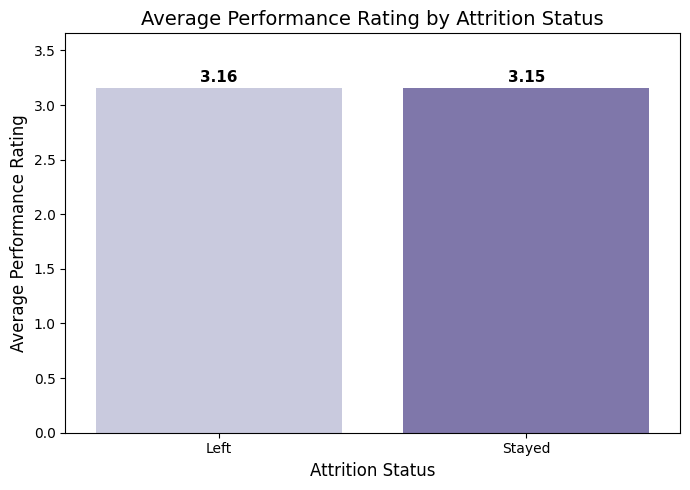

In [71]:
# Assuming your main DataFrame is named df. Adjust if your variable name differs.
# If you have a prepared DataFrame with Attrition_Flag (1=Left, 0=Stayed) and 'PerformanceRating'

# Map binary attrition flag to readable status
df['Attrition_Status'] = df['Attrition_Flag'].map({0: 'Stayed', 1: 'Left'})

# Group by Attrition_Status and calculate average performance rating
perf_summary = df.groupby('Attrition_Status')['PerformanceRating'].agg(['mean', 'count']).reset_index()

# Plotting
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    data=perf_summary,
    x='Attrition_Status',
    y='mean',
    palette='Purples'
)

# Add value labels on the bars
for i, row in perf_summary.iterrows():
    ax.text(
        i, row['mean'] + 0.03, f"{row['mean']:.2f}",
        ha='center', va='bottom', fontsize=11, fontweight='bold'
    )

# Set plot title and labels
ax.set_title('Average Performance Rating by Attrition Status', fontsize=14)
ax.set_xlabel('Attrition Status', fontsize=12)
ax.set_ylabel('Average Performance Rating', fontsize=12)
plt.ylim(0, perf_summary['mean'].max() + 0.5)
plt.tight_layout()
plt.show()


 
The average performance rating is almost identical for employees who left and those who stayed (3.16 vs. 3.15).  
This indicates that performance does not appear to be a meaningful factor in explaining attrition.  
High and low performers leave at similar rates, suggesting that turnover is not driven by employee performance levels.

 
דירוגי הביצועים הממוצעים של העובדים שעזבו ושל אלה שנשארו דומים כמעט לחלוטין (3.16 לעומת 3.15)  
נתון זה מצביע על כך שביצועים אינם מהווים גורם משמעותי המסביר את תופעת הנטישה
גם עובדים בעלי ביצועים גבוהים וגם נמוכים עוזבים בשיעורים דומים, ולכן נראה שהנטישה אינה נובעת מרמת ביצועים

</div>


### 4.6 Training and Retention – השפעת הדרכות על שימור

We analyze how participation in training (TrainingTimesLastYear) is associated with retention

הניתוח בוחן האם עובדים המשתתפים בהדרכות ובהזדמנויות פיתוח
נוטים להישאר יותר בארגון, לעומת עובדים שאינם לוקחים חלק בפעילויות אלו


C:\Users\moran\AppData\Local\Temp\ipykernel_196\3564823032.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TrainingParticipation')['Attrition_Flag']


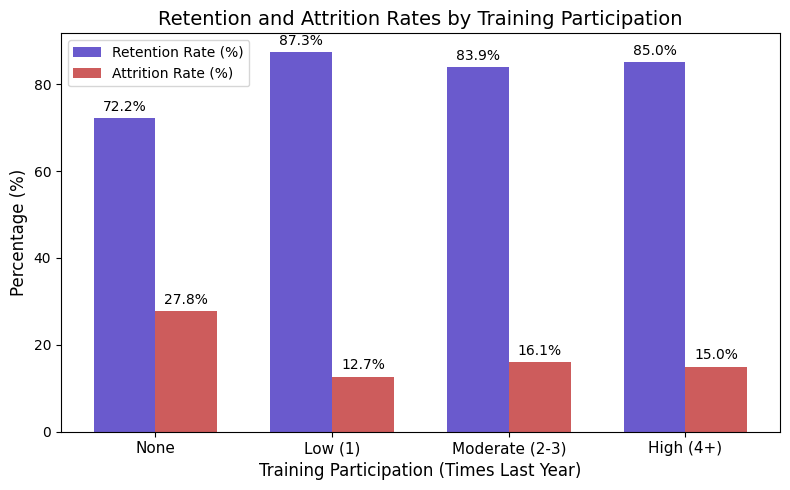

  TrainingParticipation  Total  Retention_Rate_%  Attrition_Rate_%
0                  None     54         72.222222         27.777778
1               Low (1)     71         87.323944         12.676056
2        Moderate (2-3)   1038         83.911368         16.088632
3             High (4+)    307         85.016287         14.983713


In [72]:
# Investigate the relationship between training participation and retention rates

# We'll use the TrainingTimesLastYear column as a proxy for training participation,
# and Attrition_Flag (1=Left, 0=Stayed) for retention.

# 1. Create categorical bins for training participation for clear summarization
bins = [-1, 0, 1, 3, np.inf]
labels = ['None', 'Low (1)', 'Moderate (2-3)', 'High (4+)']
df['TrainingParticipation'] = pd.cut(df['TrainingTimesLastYear'], bins=bins, labels=labels)

# 2. Calculate retention/attrition rates for each training participation group
training_retention = (
    df.groupby('TrainingParticipation')['Attrition_Flag']
    .agg(
        Total='count',
        Left='sum'
    )
    .reset_index()
)
training_retention['Retention_Rate_%'] = 100 * (1 - training_retention['Left'] / training_retention['Total'])
training_retention['Attrition_Rate_%'] = 100 * (training_retention['Left'] / training_retention['Total'])

# 3. Plot retention and attrition rates by training group (side by side bars)
fig, ax1 = plt.subplots(figsize=(8, 5))
x = np.arange(len(training_retention['TrainingParticipation']))
width = 0.35

rects1 = ax1.bar(
    x - width/2,
    training_retention['Retention_Rate_%'],
    width,
    label='Retention Rate (%)',
    color='slateblue'
)
rects2 = ax1.bar(
    x + width/2,
    training_retention['Attrition_Rate_%'],
    width,
    label='Attrition Rate (%)',
    color='indianred'
)

# Value labels on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax1.annotate(f'{height:.1f}%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Axes and legend settings
ax1.set_xticks(x)
ax1.set_xticklabels([l.replace('_', '\n') for l in training_retention['TrainingParticipation'].astype(str)], fontsize=11, rotation=0)  # Make sure X-axis labels are horizontal
ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.set_xlabel('Training Participation (Times Last Year)', fontsize=12)
ax1.set_title('Retention and Attrition Rates by Training Participation', fontsize=14)
ax1.legend(loc='best')
plt.tight_layout()
plt.show()

# Optionally, display the table as well
print(training_retention[['TrainingParticipation', 'Total', 'Retention_Rate_%', 'Attrition_Rate_%']])


 
The results show a clear relationship between training participation and retention.  
Employees who did not participate in any training have the highest attrition rate (**27.8%**), making them the most at-risk group.  
Even minimal training (a single session per year) significantly improves retention, reducing attrition to **12.7%**, the lowest among all groups.  
Moderate and high training participation levels (2–3 or 4+ sessions) maintain similarly strong retention rates (around **84–85%**), with only small differences between them.  

Overall, this analysis suggests that providing employees with at least some training opportunities is strongly associated with reduced turnover.

 
התוצאות מצביעות על קשר ברור בין השתתפות בהכשרות לבין שימור עובדים  
העובדים שלא השתתפו כלל בהדרכות מציגים את שיעור הנטישה הגבוה ביותר (**27.8%**) והם קבוצת הסיכון המרכזית לעזיבה 
לעומת זאת, אפילו השתתפות יחידה בהכשרה במהלך השנה מורידה משמעותית את שיעור הנטישה ל־**12.7%**, שהוא הנמוך ביותר מבין כל הקבוצות 
רמות השתתפות בינוניות וגבוהות (2–3 או 4+ הדרכות) ממשיכות לשמור על שיעורי שימור גבוהים מאוד (כ־**84–85%**) עם פערים קטנים בלבד ביניהן

בסך הכול, הממצאים מצביעים על כך שהצעת הזדמנויות הכשרה—even בסיסיות—קשורה באופן מובהק לירידה בנטישה ולשיפור משמעותי בשימור עובדים

</div>


### 4.7 Geographic and Commuting Factors – גורמים גאוגרפיים ומרחק נסיעה

Here we look at DistanceFromHome and related geographic factors.
בקטע זה אנו בוחנים האם עובדים שגרים רחוק ממקום העבודה
נוטים לנטוש בשיעור גבוה יותר, ומה המשמעות עבור מדיניות עבודה גמישה או היברידית.


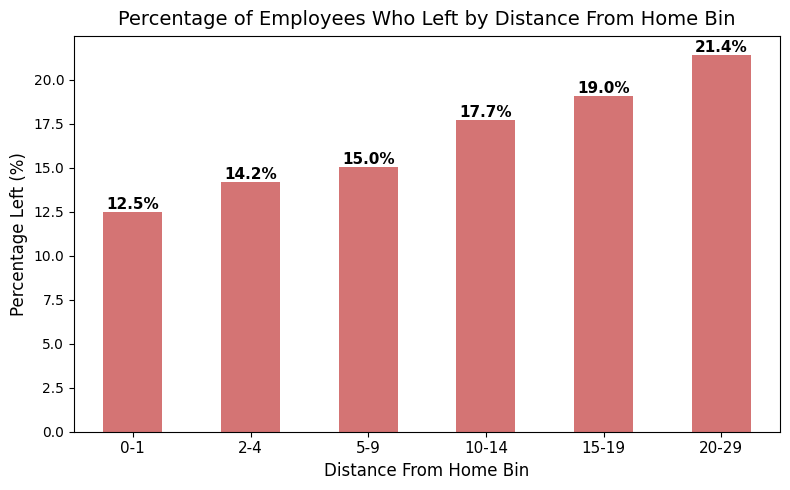

             Left  Total     Left_%
DistanceBin                        
0-1            26    208  12.500000
2-4            51    359  14.206128
5-9            56    373  15.013405
10-14          31    175  17.714286
15-19          24    126  19.047619
20-29          49    229  21.397380


In [73]:
# Percentage of employees who left (Attrition) by DistanceFromHome bins

bin_edges = [0, 2, 5, 10, 15, 20, 30]
bin_labels = ['0-1', '2-4', '5-9', '10-14', '15-19', '20-29']
df['DistanceBin'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

bin_counts = df.groupby('DistanceBin', observed=False)['Attrition_Flag'].agg(Left='sum', Total='count')
bin_counts['Left_%'] = (bin_counts['Left'] / bin_counts['Total'] * 100).fillna(0)

ax = bin_counts['Left_%'].plot(kind='bar', color='indianred', alpha=0.85, figsize=(8,5))
for i, pct in enumerate(bin_counts['Left_%']):
    ax.annotate(f"{pct:.1f}%", (i, pct), ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.set_xlabel('Distance From Home Bin', fontsize=12)
ax.set_ylabel('Percentage Left (%)', fontsize=12)
ax.set_title('Percentage of Employees Who Left by Distance From Home Bin', fontsize=14, pad=8)
ax.set_xticklabels(bin_counts.index, rotation=0, ha='center', fontsize=11)  # X-axis labels are now horizontal and centered
plt.tight_layout()
plt.show()

print(bin_counts[['Left', 'Total', 'Left_%']])



The chart shows a clear positive relationship between distance from home and attrition.  
Employees who live very close to the workplace (0–1 km) have the lowest attrition rate (~12.5%).  
As distance increases, attrition rises consistently: 14–15% for mid-range distances, and up to **21.4%** for employees living 20–29 km away.  

This pattern suggests that longer commutes are associated with higher turnover, likely due to increased fatigue, time investment, or decreased work–life balance.

 
הגרף מציג קשר חיובי ברור בין מרחק מגורים לבין נטישת עובדים
עובדים המתגוררים קרוב מאוד למקום העבודה (0–1 ק"מ) מציגים את שיעור הנטישה הנמוך ביותר (כ־12.5%)
ככל שהמרחק גדל, שיעור הנטישה עולה בצורה עקבית: כ־14–15% למרחקים בינוניים, ועד **21.4%** לעובדים הגרים 20–29 ק"מ מהמקום
ממצא זה מצביע על כך שנסיעה ארוכה יותר לעבודה קשורה בסיכון גבוה יותר לעזיבה - ייתכן בשל עייפות, השקעת זמן גבוהה יותר בנסיעה, או פגיעה באיזון בית–עבודה

</div>



### Summary of Key KPIs / סיכום מדדי מפתח

Below is a structured summary of the main quantitative indicators derived from the analysis

להלן סיכום מרוכז של מדדי המפתח שעלו מהניתוח

- **Overall attrition rate / שיעור נטישה כללי:** אחוז העובדים שעזבו מתוך כלל העובדים.
- **Attrition by department / נטישה לפי מחלקה:** זיהוי מחלקות בסיכון גבוה (למשל Sales) מול מחלקות יציבות יותר.
- **Attrition by job role / נטישה לפי תפקיד:** תפקידים מסוימים מאופיינים בשיעורי נטישה גבוהים יותר ודורשים תשומת לב ניהולית.
- **Tenure buckets / ותק:** עובדים עם פחות משנה בארגון בסיכון נטישה גבוה במיוחד,
  בעוד שעובדים עם 10–20 שנות ותק מציגים שיעורי נטישה נמוכים.
- **Work–life balance and satisfaction / איזון חיים-עבודה ושביעות רצון:** רמות נמוכות של שביעות רצון
  ואיזון חיים-עבודה קשורות לנטישה גבוהה יותר.
- **Training & development / הדרכות ופיתוח:** השתתפות בהדרכות קשורה לעיתים לשימור טוב יותר,
  במיוחד בקבוצות סיכון.
- **Distance from home / מרחק נסיעה:** מרחק רב יותר מהבית נוטה להעלות את שיעור הנטישה.

מדדים אלו מהווים את בסיס ההמלצות ומסייעים למקד את פעולות משאבי האנוש באזורים המשפיעים ביותר.



# <a id='Insights-and-Conclusions'></a>
## 6. Insights and Conclusions / תובנות ומסקנות

- Early tenure (< 1 year) is the highest‑risk period for attrition.
- Longer commuting distance increases the probability of leaving.
- Certain roles and departments show consistently higher attrition.
- Long‑tenured employees (10+ years) exhibit the most stability.

עיקרי התובנות:
- השנה הראשונה היא שלב קריטי שבו עובדים רבים מחליטים אם להישאר או לעזוב
- מרחק נסיעה גדול מהבית מעלה את הסיכון לנטישה
- ישנם תפקידים ומחלקות עם שיעורי נטישה גבוהים במיוחד, הדורשים התערבות ניהולית
- עובדים ותיקים מאוד מהווים גרעין יציב של הארגון וראוי להשקיע בשימורם



# <a id='Recommendations'></a>
## 7. Recommendations / המלצות

### 7.1 Targeted Retention Actions – פעולות שימור ממוקדות
- Focus on high‑risk tenure groups (especially first‑year employees).
- Prioritize roles and departments with elevated attrition rates.

המלצות:
- לזהות עובדים בסיכון גבוה בשנה הראשונה ולהציע ליווי מקצועי וחונכות
- לבחון עומסים, תנאים ותהליכי ניהול במחלקות עם שיעורי נטישה גבוהים

### 7.2 Work Environment & Work–Life Balance – סביבת עבודה ואיזון חיים‑עבודה
- Improve satisfaction through structured feedback and recognition.
- Offer hybrid/remote options, especially for long‑commute employees.

המלצות:
- להטמיע מנגנוני משוב קבועים והכרה בהישגים.
- לבחון מודלי עבודה גמישים (היברידי/מרחוק) עבור עובדים המתגוררים רחוק.

### 7.3 Career Growth & Promotion – פיתוח קריירה וקידום
- Ensure transparent promotion pathways.
- Expand upskilling and mobility programs.

המלצות:
- להגדיר מסלולי קידום ברורים ולתקשרם לעובדים.
- לפתח תוכניות הכשרה והעברה בין תפקידים (Internal Mobility).

### 7.4 Compensation & Rewards – שכר ותמריצים
- Benchmark salary structures regularly.
- Consider targeted retention bonuses for critical positions.

המלצות:
- לוודא שהשכר תחרותי ביחס לשוק.
- לשקול בונוסים/תמריצי שימור לעובדים בתפקידים קריטיים או בעלי ביצועים גבוהים.
